In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Create a Portfolio
df = pd.read_csv('/Users/omid/tmp/stockMarketPrediction_DL/tse_en.csv')
df.head()

,Date,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
0,2008-12-06,بموتوح,ح . موتوژن‌,605,619,619,619,14,619.0,619.0,1,500,309500
1,2008-12-06,كاما,باما,2580,2657,2657,2605,25,2656.0,2657.0,14,21000,55793000
2,2008-12-06,شتوليح,ح . تولي‌پرس‌,1486,1500,1500,1500,14,1500.0,1500.0,1,733,1099500
3,2008-12-06,ثشاهد,سرمايه‌ گذاري‌ شاهد,2891,2977,2977,2910,19,2977.0,2977.0,34,130347,388043019
4,2008-12-06,لسرما,سرما آفرين‌,1698,1748,1748,1706,8,1748.0,1748.0,2,9514,16630472


In [3]:
khodro = df[df.Symbol == "خودرو"].dropna()
ring = df[df.Symbol == "خرينگ"].dropna()
bahman = df[df.Symbol == "خبهمن"].dropna()
mohareke = df[df.Symbol == "خمحركه"].dropna()

In [4]:
khodro.index = pd.to_datetime(khodro['Date'])
ring.index = pd.to_datetime(ring['Date'])
bahman.index = pd.to_datetime(bahman['Date'])
mohareke.index = pd.to_datetime(mohareke['Date'])

In [5]:
khodro.drop(columns="Date", inplace=True)
ring.drop(columns="Date", inplace=True)
bahman.drop(columns="Date", inplace=True)
mohareke.drop(columns="Date", inplace=True)

In [7]:
stocks = pd.concat([khodro.Close, ring.Close, bahman.Close, mohareke.Close], axis=1)
stocks.columns = ['khodro', 'ring', 'bahman', 'mohareke']

In [8]:
stocks.head()

,khodro,ring,bahman,mohareke
Date,,,,
2008-12-06,1278.0,NaN,NaN,1549.0
2008-12-07,1283.0,871.0,860.0,1541.0
2008-12-08,1287.0,NaN,NaN,1538.0
2008-12-10,1291.0,NaN,NaN,1530.0
2008-12-13,1295.0,NaN,NaN,NaN


In [9]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

khodro      0.000987
ring        0.001720
bahman      0.001147
mohareke    0.001153
dtype: float64

In [11]:
stocks.pct_change(1).corr()

,khodro,ring,bahman,mohareke
khodro,1.000000,0.244586,0.306938,0.222223
ring,0.244586,1.000000,0.220227,0.230534
bahman,0.306938,0.220227,1.000000,0.217199
mohareke,0.222223,0.230534,0.217199,1.000000


<AxesSubplot:xlabel='Date'>

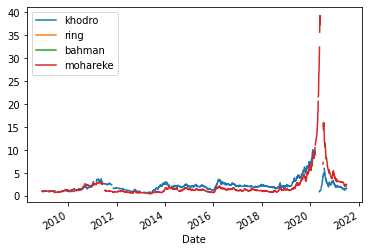

In [12]:
stocks_normed = stocks / stocks.iloc[0]
stocks_normed.plot()

In [13]:
stocks_daily_ret = stocks.pct_change(1)
stocks_daily_ret.head()

,khodro,ring,bahman,mohareke
Date,,,,
2008-12-06,NaN,NaN,NaN,NaN
2008-12-07,0.003912,NaN,NaN,-0.005165
2008-12-08,0.003118,0.0,0.0,-0.001947
2008-12-10,0.003108,0.0,0.0,-0.005202
2008-12-13,0.003098,0.0,0.0,0.000000


In [15]:
#Log Returns vs Arithmetic Returns
log_ret = np.log(stocks / stocks.shift(1))
log_ret.head()

,khodro,ring,bahman,mohareke
Date,,,,
2008-12-06,NaN,NaN,NaN,NaN
2008-12-07,0.003905,NaN,NaN,-0.005178
2008-12-08,0.003113,NaN,NaN,-0.001949
2008-12-10,0.003103,NaN,NaN,-0.005215
2008-12-13,0.003094,NaN,NaN,NaN


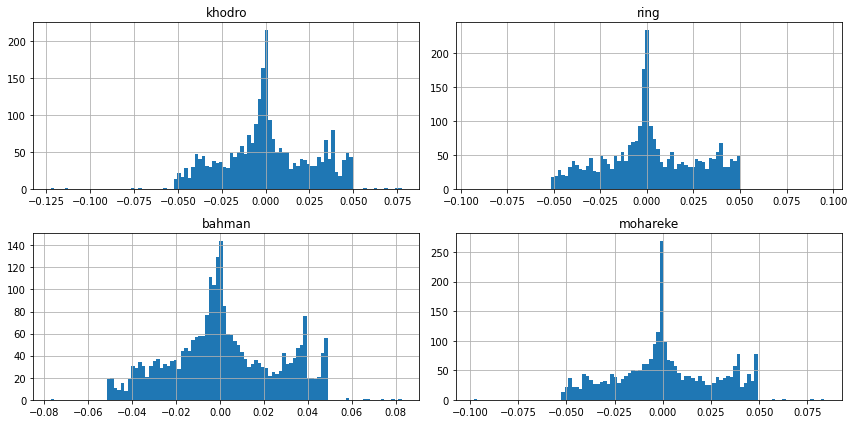

In [16]:
log_ret.hist(bins=100, figsize=(12,6));
plt.tight_layout()

In [17]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
khodro,2564.0,0.000968,0.025187,-0.122431,-0.014402,0.000000,0.018694,0.077536
ring,2634.0,0.002089,0.025428,-0.093169,-0.013706,0.000000,0.021012,0.095360
bahman,2645.0,0.001730,0.024521,-0.076919,-0.013563,-0.000448,0.018672,0.082661
mohareke,2637.0,0.001211,0.025655,-0.098121,-0.015076,0.000000,0.019048,0.083848


In [18]:
log_ret.mean() * 252

khodro      0.243877
ring        0.526440
bahman      0.435975
mohareke    0.305068
dtype: float64

In [19]:
# Compute pairwise covariance of columns
log_ret.cov()

,khodro,ring,bahman,mohareke
khodro,0.000634,0.000258,0.000372,0.000302
ring,0.000258,0.000647,0.000262,0.000296
bahman,0.000372,0.000262,0.000601,0.000244
mohareke,0.000302,0.000296,0.000244,0.000658


In [20]:
log_ret.cov() * 252 # multiply by days

,khodro,ring,bahman,mohareke
khodro,0.159862,0.065073,0.093625,0.076084
ring,0.065073,0.162935,0.065939,0.074682
bahman,0.093625,0.065939,0.151519,0.061570
mohareke,0.076084,0.074682,0.061570,0.165865


In [21]:
# Single Run for Some Random Allocation

In [25]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['khodro', 'ring', 'bahman', 'mohareke'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.38156651737687297


Expected Volatility
0.32283063011685714


Sharpe Ratio
1.1819402552934795


In [26]:
#Now we can just run this many times over!

num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [27]:
#https://www.investopedia.com/terms/s/sharperatio.asp
sharpe_arr.max()

1.4464061261837475

In [28]:
sharpe_arr.argmax()

5224

In [29]:
all_weights[5224,:]

array([0.00278965, 0.52840867, 0.4210886 , 0.04771308])

In [30]:
max_sr_ret = ret_arr[7094]
max_sr_vol = vol_arr[7094]

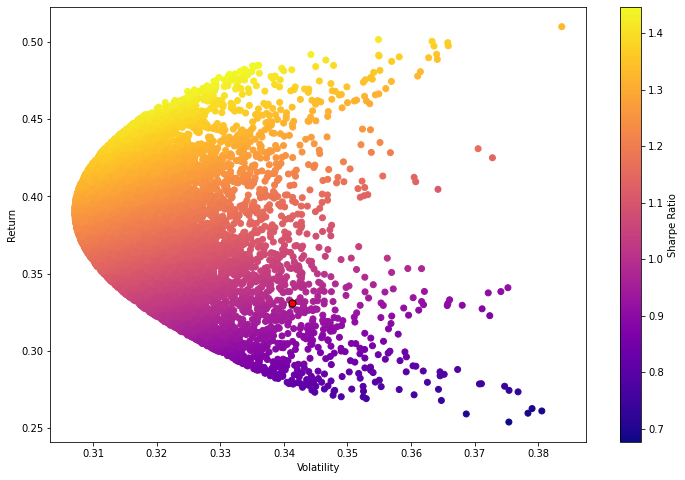

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')